# Linear Regression

**SKLearn.linear_Regression**


LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

**Notes**
From the implementation point of view, this is just plain Ordinary Least Squares or Non Negative Least Squares wrapped as a predictor object.

Ordinary Least Squares (OLS) Method
To use OLS method, we apply the below formula to find the equation

<img src="OLS.png">
<img src="ols1.png">








### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [2]:
df = pd.read_csv("Salary_Data.csv")
x = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,-1].values.reshape(-1,1)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Feature scaling
Here, scaling for target feature is done before splitting the data. This is done because, a target feature with a large spread of values, in turn, may result causing weight values to change dramatically, making the learning process unstable.

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y = sc.fit_transform(y)

### Splitting the dataSet into Training & Testing

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=0)

### Feature Scaling on the dataset
Here, the feature scaling is dne after splitting the dataset into training and testing so as to make the model learn to transform the testing data based on the parameters calculated for transforming the training dataset and hence, *sc.fit_transform* is used for training dataset and only *sc.transform* for testing dataset.

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Fitting the training dataset into model

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

### Predicting the testing Dataset

In [6]:
y_pred = regressor.predict(x_test)

### Regresssion Coefficients (Slope)
Slope indicated, for a unit change in the x-axis value (here, experience) what will be the respective
change in the Y-axis value (here, Salary)

In [7]:
regressor.coef_

array([[0.34799407]])

### Regression Intercept
Intercept indicates that when my x-axis value (here, experience) is zero, where does my salary actually points to the y-axis

In [8]:
regressor.intercept_

array([-1.81854065])

### Evaluation of model

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test,y_pred)

0.13016958967275338

In [10]:
# Mean Squared error
mse = mean_squared_error(y_test,y_pred)
print(mse)

0.03084372046005702


In [11]:
# Root mean squared error
rms = np.sqrt(mse)
print(rms)

0.17562380379680034


In [12]:
# Calculating R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9779208335417601


Basically **R2** tells us that how much the variation in prdiction can be explained by taking the actual weight into account.
here, r2 = 97.79%, it illustrate that there is 97.79% reduction in variance when we take "Years of experience" into account. Alernatively, we can say that "years of experience" explains 97.79% of the variation in "Salary"

### Visualising the Training set results

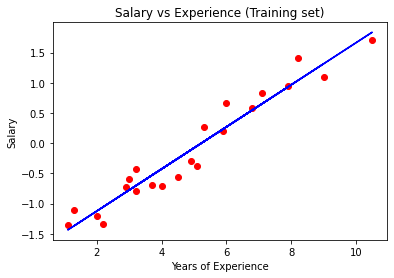

In [13]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Visualising Testing results

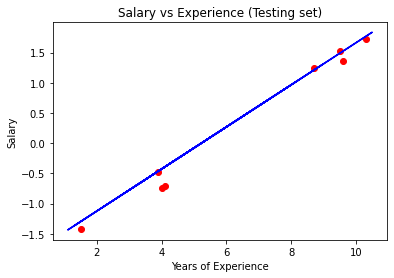

In [14]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()